/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['pose_1.csv', 'pose_2.csv', 'pose_3.csv']
['pose_1.csv', 'pose_2.csv', 'pose_3.csv']
['pose_1.csv', 'pose_2.csv', 'pose_3.csv']
['pose_1.csv', 'pose_2.csv', 'pose_3.csv', 'pose_4.csv']


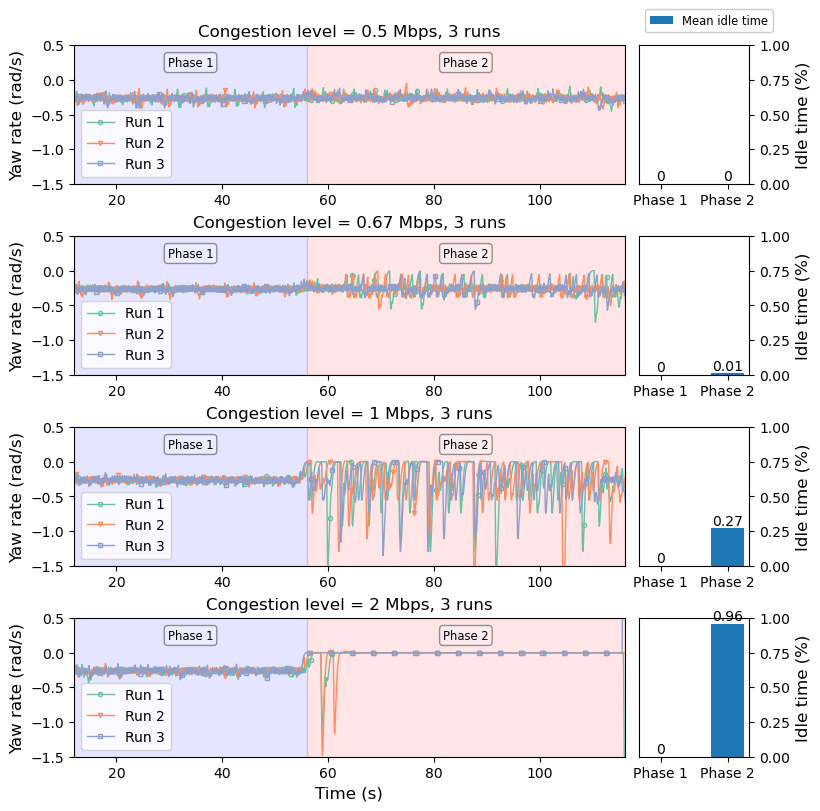

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler
import seaborn as sb

def plot_serie(path_to_csv, name_x, name_y):
    fig, ax = plt.subplots()
    
    serie = pd.read_csv(str(path_to_csv), sep=' ', header=None)
        
    ax.plot(serie['sec']+serie['nsec']*1e-9, serie[1], label='yaw_rate')

    ax.set_xlabel(str(name_x))
    ax.set_ylabel(str(name_y))

    return fig, ax

def plot_multiple_series(ax, path_to_folder, filter=None, start=0, end=None):

    exp_list = os.listdir(path_to_folder)
    if filter is not None:
        exp_list = [exp for exp in exp_list if filter in exp]
    exp_list.sort()
    if end is None:
        end = len(exp_list)
    print(exp_list)
    
    markers=['o', 'v', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'x', '^', '+', '1', '2', '3', '4', '8', '|', '_', '.', ',']
    styles = cycler(
        color=sb.color_palette(palette='Set2', n_colors=len(exp_list)),
        marker = markers[:len(exp_list)],
    )
    
    i=1
    for style, exp in zip(styles, exp_list[start:end]):
        serie = pd.read_csv(str(path_to_folder+'/'+exp), sep=',')
                
        ax.plot(serie['sec']+serie['nsec']*1e-9-serie['sec'][0], serie['wz'], label="Run "+str(i), linewidth=1, markersize=3, markerfacecolor='none', markevery=200, **style)
        # ax.plot(serie['sec']+serie['nsec']*1e-9-serie['sec'][0], serie['wz'], label=exp)
        i += 1

    # ax.vlines(x=17.5, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    # ax.vlines(x=24.7, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    # ax.vlines(x=39.7, ymin=0, ymax=1.5, colors='black', linestyles='solid')
    phase0_start = 0
    phase0_end = 12
    phase1_start = 12
    phase1_end = 56
    phase2_start = 56
    phase2_end = 116
    phase3_start = 116
    phase3_end = 140
    
    
    ax.axvspan(xmin=phase1_start, xmax=phase1_end, alpha=0.1, color='b')
    ax.axvspan(xmin=phase2_start, xmax=phase2_end, alpha=0.1, color='r')
    props = dict(boxstyle='round', alpha=0.4, facecolor='ghostwhite')
    # ax.text(x=phase0_start+(phase0_end-phase0_start)/2, y=1.3, s="Phase 0", horizontalalignment='center', verticalalignment='center', bbox=props)
    ax.text(x=phase1_start+(phase1_end-phase1_start)/2, y=0.25, s="Phase 1", horizontalalignment='center', verticalalignment='center', bbox=props, fontsize='small')
    ax.text(x=phase2_start+(phase2_end-phase2_start)/2, y=0.25, s="Phase 2", horizontalalignment='center', verticalalignment='center', bbox=props, fontsize='small')
    # ax.text(x=phase3_start+(phase3_end-phase3_start)/2, y=1.3, s="Phase 3", horizontalalignment='center', verticalalignment='center', bbox=props)

    ax.set_ylabel("Yaw rate (rad/s)", fontsize='12')
    
    ax.set_xlim(left=phase1_start, right=phase2_end)
    ax.set_ylim(bottom=-1.5, top=0.5)
    
    ax.legend(loc='lower left')
    
    return ax

def plot_std_dev(ax, path_to_folder, filter=None, start=0, end=None):

    exp_list = os.listdir(path_to_folder)
    if filter is not None:
        exp_list = [exp for exp in exp_list if filter in exp]
    exp_list.sort()
    if end is None:
        end = len(exp_list)

    std_devs_no_congestion = []
    std_devs_congestion = []
    means_congestion = []
    means_no_congestion = []
    for exp in exp_list[start:end]:
        serie = pd.read_csv(str(path_to_folder+'/'+exp), sep=',')
        index_stable_flight = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>17.5)
        index_start_congestion = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>56.0)
        index_end_congestion = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>116.0)
        std_dev_no_congestion = np.std(serie['wz'][index_stable_flight:index_start_congestion])
        mean_no_congestion = np.mean(serie['wz'][index_stable_flight:index_start_congestion])
        # print(serie[1][index_stable_flight:index_start_congestion])
        std_dev_congestion = np.std(serie['wz'][index_start_congestion:index_end_congestion])
        mean_congestion = np.mean(serie['wz'][index_start_congestion:index_end_congestion])
        std_devs_no_congestion.append(std_dev_no_congestion)
        std_devs_congestion.append(std_dev_congestion)
        means_congestion.append(mean_congestion)
        means_no_congestion.append(mean_no_congestion)
        # print(exp+" : "+str(std_dev_no_congestion)+" | "+str(std_dev_congestion))

    width = 0.3
    multiplier = 0
    phases = ("Phase 1", "Phase 2")
    
    means = [np.mean(means_no_congestion), np.mean(means_congestion)]
    stdevs = [np.mean(std_devs_no_congestion), np.mean(std_devs_congestion)]
    
    print(means)
    print(stdevs)
    
    colors_means = 'seagreen'
    colors_stdevs = 'darkviolet'
    
    index = np.arange(len(phases))
    # means_stdevs = {
    #     'Mean': (np.mean(means_no_congestion), np.mean(means_congestion)),
    #     'Std. Dev.': (np.mean(std_devs_no_congestion), np.mean(std_devs_congestion))
    # }
    # for key, value in means_stdevs.items():
    #     rects = ax.bar(index + multiplier * width, value, width, label=key, color=['salmon', 'indianred'])
    #     # for patch in rects.patches:
    #     #     patch.set_height(round(patch.get_height(), 3))
    #     # ax.bar_label(rects, padding=0)
    #     multiplier += 1
    
    # Plot bars for Means
    for i, value in enumerate(means):
        ax.bar(index[i], abs(value), width, label='Mean' if i == 0 else "", color=colors_means)

    # Plot bars for stdevs
    for i, value in enumerate(stdevs):
        ax.bar(index[i] + width, value, width, label='Std. Dev.' if i == 0 else "", color=colors_stdevs)
        
    ax.set_xticks(index + 0.5*width, phases)
    ax.legend(loc='upper left', bbox_to_anchor=(0.0, 1.3), labelspacing=0.2, framealpha=1.0, fontsize='small')
        

    return ax

def plot_idle_time(ax, path_to_folder, delta_wz, filter=None, start=0, end=None):
    
    exp_list = os.listdir(path_to_folder)
    if filter is not None:
        exp_list = [exp for exp in exp_list if filter in exp]
    exp_list.sort()
    if end is None:
        end = len(exp_list)
    
    start_stable_flight = 17.5
    end_stable_flight = 56.0
    start_congestion = 56.0
    end_congestion = 116.0

    idle_time_no_congestion = []
    idle_time_congestion = []
    for exp in exp_list[start:end]:
        serie = pd.read_csv(str(path_to_folder+'/'+exp), sep=',')
        
        idle_points_no_congestion = 0
        idle_points_congestion = 0
        index_stable_flight = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>start_stable_flight)
        index_start_congestion = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>start_congestion)
        index_end_congestion = np.argmax(serie['sec']+serie['nsec']*1e-9-serie['sec'][0]>end_congestion)

        for yaw_rate in serie['wz'][index_stable_flight:index_start_congestion]:
            if abs(yaw_rate) <= delta_wz:
                idle_points_no_congestion += 1
        for yaw_rate in serie['wz'][index_start_congestion:index_end_congestion]:
            if abs(yaw_rate) <= delta_wz:
                idle_points_congestion += 1
        t = serie['sec'][10]+serie['nsec'][10]*1e-9-(serie['sec'][9]+serie['nsec'][9]*1e-9) # took 10 arbitrary
        idle_time_no_congestion.append(idle_points_no_congestion*t/(end_stable_flight-start_stable_flight))
        idle_time_congestion.append(idle_points_congestion*t/(end_congestion-start_congestion))
    
    width = 0.1
    phases = ("Phase 1", "Phase 2")

    rects = ax.bar([0.2, 0.4], [np.mean(idle_time_no_congestion), np.mean(idle_time_congestion)], width, label='Mean idle time' if i == 0 else "")
    for patch in rects.patches:
        patch.set_height(round(patch.get_height(), 2))
    ax.bar_label(rects, padding=0)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylim(0,1)
    ax.set_ylabel("Idle time (%)", fontsize='12')
    ax.set_xticks([0.2, 0.4], phases)
    
    return ax
        

# exp_list = os.listdir('../yaw_rates')
# for exp in exp_list:
#     print("Potting "+exp)
#     fig, ax = plot_serie('../yaw_rates/'+exp, 'time', 'yaw_rate')

_ros_ws = os.environ["ROS_WS"]
²
congestion_levels = [16000, 12000, 8000, 4000]
nrows = len(congestion_levels)

plt.rcParams['figure.figsize'] = [8, nrows*2]

gs_kw = dict(width_ratios=[5, 1])
fig, axs = plt.subplots(nrows=nrows,ncols=2, gridspec_kw=gs_kw, layout='constrained', sharey='col')

for i in range(nrows):
    scenario_name = str(_ros_ws)+'/data/carousel_sim/0222_carousel_spectrum_congestion_'+str(congestion_levels[i])
    plot_multiple_series(axs[i][0], scenario_name, start=0, end=3)
    axs[i][0].set_title(f'Congestion level = {8000/congestion_levels[i]:.2g} Mbps, {str(3)} runs')
    
    # plot_std_dev(axs[i][1], scenario_name)
    plot_idle_time(axs[i][1], scenario_name, 0.02, start=0, end=3)

axs[len(congestion_levels)-1][0].set_xlabel("Time (s)", fontsize='12')
axs[0][1].legend(loc='upper left', bbox_to_anchor=(0.0, 1.3), labelspacing=0.2, framealpha=1.0, fontsize='small')
